In [34]:
from DatabaseCleanBestParameters import connect_and_fetch_data,find_best_ridge_params,clean_text,lemmatize_text
from DatabaseCleanBestParameters import calculer_cout
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [35]:
import pandas as pd


In [36]:
results, columns = connect_and_fetch_data("tbldictionnaire", "sol")
df = pd.DataFrame(results, columns=columns)
df['CodeIdentifications'] = pd.to_numeric(df["codeappelobjet"])
df.isna().sum()

numdictionnaire           0
codelangue                0
typedictionnaire          0
codeappelobjet            0
indexdictionnaire         0
traductiondictionnaire    0
CodeIdentifications       0
dtype: int64

In [37]:
df['CodeIdentifications'].value_counts()

CodeIdentifications
913     36
54      36
1459    34
1461    34
250     30
        ..
1535     1
1536     1
1538     1
1586     1
1533     1
Name: count, Length: 1100, dtype: int64

In [39]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 1.4 MB/s eta 0:00:18
   ---------------------------------------- 0.1/24.0 MB 787.7 kB/s eta 0:00:31
   ---------------------------------------- 0.1/24.0 MB 1.1 MB/s eta 0:00:22
   ---------------------------------------- 0.2/24.0 MB 1.2 MB/s eta 0:00:21
   ---------------------------------------- 0.3/24.0 MB 1.5 MB/s eta 0:00:17
    --------------------------------------- 0.4/24.0 MB 1.5 MB/s eta 0:00:16
    --------------------------------------- 0.5/24.0 MB 1.7 MB/s eta 0:00:14
    --------------------------------------- 0.5/24.0 MB 1.8 MB/s eta 0:00:14
   - -------------------------------------- 0.7/24.0 MB 1.9 MB/s eta 0:00:13
   - -------------------------------------- 0.8/24.0 MB 2.0 MB/s eta 0:00:12
   - -------------------------------------- 0.9/24.0 MB 2.0 MB/s eta 0:00:12
   - -------------------------------------- 0.9/24.0 MB 1.9 MB/s eta 0:00:12
   -

In [46]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np

In [57]:
# Préparation des données
df['Description_clean'] = df["traductiondictionnaire"].apply(clean_text)
df['Description_clean']=  df['Description_clean'].apply(lemmatize_text)
X = df['Description_clean']
y = df['CodeIdentifications']
# Entraîner Word2Vec sur la colonne "Description_clean"
descriptions = df['Description_clean'].tolist()

model_w2v = Word2Vec(descriptions, min_count=1)  # Ajuster les hyperparamètres
# Convertir les descriptions en vecteurs Word2Vec (à adapter à votre cas d'utilisation)
X_w2v = []
for word in descriptions:
  try:
    vector = model_w2v.wv[word]  # Attempt to get the vector
    X_w2v.append(vector)
  except KeyError:
    pass  # Ignore the word if not found
# Convertir X_w2v en un tableau numpy
# X_w2v = np.array(X_w2v)


tfidf = TfidfVectorizer(max_features=None, min_df = 1, max_df=0.5, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(descriptions)

# # Concaténer les vecteurs TF-IDF et Word2Vec
# #implémentation de TF-IDF)
# X = np.hstack((X_tfidf, X_w2v))
# Maintenant X est obtenu en concaténant les vecteurs Word2Vec et TF-IDF
# X = np.concatenate((X_w2v, X_tfidf), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [53]:
print(X.shape)

(1,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1, 13409]

In [18]:
# Préparation des données
df['Description_clean'] = df["traductiondictionnaire"].apply(clean_text)
df['Description_clean']=  df['Description_clean'].apply(lemmatize_text)

X= df['Description_clean']
y= df['CodeIdentifications']


best_params, best_scores = find_best_ridge_params(X, y)
print(f"Best parameters: {best_params}")
print(f"Best R-squared scores: {best_scores}")

Best parameters: {'min_df': 1, 'max_df': 0.5, 'ngram_range': (1, 2), 'alpha': 0.1}
Best R-squared scores: {'train': 0.5915499465209304, 'test': 0.6119106336029108}


Best parameters: {'min_df': 1, 'max_df': 0.5, 'ngram_range': (1, 2), 'alpha': 0.1}
Best R-squared scores: {'train': 0.5915499465209304, 'test': 0.6119106336029108}

In [22]:
X = df['Description_clean']
y = df['CodeIdentifications']
tfidf = TfidfVectorizer(max_features=None, min_df = 1, max_df=0.5, ngram_range=(1,2))

X = tfidf.fit_transform(X)


# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80 Train et 20 test 

# Modèle de régression
model_Ridge = Ridge(alpha=0.1)
model_Ridge.fit(X_train, y_train)


# Calcul des métriques d'évaluation
mse_train = mean_squared_error(y_train, model_Ridge.predict(X_train))
mse_test = mean_squared_error(y_test, model_Ridge.predict(X_test))

r2_train = r2_score(y_train, model_Ridge.predict(X_train))
r2_test = r2_score(y_test, model_Ridge.predict(X_test))

print(f"Mean Squared Error (MSE) sur les données d'entraînement :{mse_train}")
print(f"Mean Squared Error (MSE) sur les données de test  :{mse_test}")
print(f"R-squared (R²) sur les données d'entraînement :{r2_train}")
print(f"R-squared (R²) sur les données de test  :{r2_test}")



NameError: name 'df' is not defined

# Test pour corriger le surajusterment du modele

In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score

# # Sélection des données
# X = df['Description_clean']
# y = df['CodeIdentifications']

# # Vectorisation des données textuelles
# tfidf = TfidfVectorizer(max_features=None, min_df=1, max_df=0.5, ngram_range=(1, 2))
# X = tfidf.fit_transform(X)

# # Séparation des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Modèle de régression Ridge avec régularisation
# alpha = 1.0  # Valeur initiale d'alpha
# while True:
#     # Entraînement du modèle Ridge
#     model_Ridge = Ridge(alpha=alpha)
#     model_Ridge.fit(X_train, y_train)

#     # Calcul des métriques d'évaluation
#     mse_train = mean_squared_error(y_train, model_Ridge.predict(X_train))
#     mse_test = mean_squared_error(y_test, model_Ridge.predict(X_test))
#     r2_train = r2_score(y_train, model_Ridge.predict(X_train))
#     r2_test = r2_score(y_test, model_Ridge.predict(X_test))

#     # print(f"Alpha: {alpha}")
#     # print(f"Mean Squared Error (MSE) sur les données d'entraînement : {mse_train}")
#     # print(f"Mean Squared Error (MSE) sur les données de test : {mse_test}")
#     # print(f"R-squared (R²) sur les données d'entraînement : {r2_train}")
#     # print(f"R-squared (R²) sur les données de test : {r2_test}")

#     # Si le MSE sur les données de test commence à augmenter, arrêtez
#     if mse_test < mse_train:
#         break
#     alpha *= 10.0  # Augmenter alpha et réessayer


In [25]:
# # Affichage des résultats finaux
# # print("Résultats finaux avec le meilleur alpha:")
# print(f"Alpha: {alpha / 10.0}")
# print(f"Mean Squared Error (MSE) sur les données d'entraînement : {mse_train}")
# print(f"Mean Squared Error (MSE) sur les données de test : {mse_test}")
# print(f"R-squared (R²) sur les données d'entraînement : {r2_train}")
# print(f"R-squared (R²) sur les données de test : {r2_test}")

In [7]:
results_cout, columns_cout = connect_and_fetch_data("tblcoutrex")
dataframe_cout = pd.DataFrame(results_cout, columns=columns_cout)
dataframe_cout.head()

,numcoutrex,codesolution,coderex,minicoutrex,maxicoutrex,reelcoutrex,codemonnaiecoutrex,codeunitecoutrex,codedifficulte,codelicense
0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3
1,2,248,2,NaN,NaN,8333.0,3.0,1.0,8.0,3
2,3,226,4,NaN,NaN,129000.0,2.0,1.0,3.0,3
3,4,437,11,NaN,NaN,2000.0,2.0,1.0,8.0,3
4,5,160,34,NaN,NaN,5000.0,2.0,1.0,1.0,3


In [8]:
print(dataframe_cout[dataframe_cout['codesolution']==466 ])


Empty DataFrame
Columns: [numcoutrex, codesolution, coderex, minicoutrex, maxicoutrex, reelcoutrex, codemonnaiecoutrex, codeunitecoutrex, codedifficulte, codelicense]
Index: []


In [57]:
def calculer_cout(code_solution, dataframe):
    """
    Calcule le coût d'une solution.

    Args:
        code_solution (str): Le code de la solution.
        dataframe (pandas.DataFrame): Le DataFrame contenant les informations sur les solutions.

    Returns:
        float: Le coût de la solution.
    """
    # Convertir les colonnes 'reelcoutrex', 'maxicoutrex' et 'minicoutrex' en double
    for col in ['reelcoutrex', 'maxicoutrex', 'minicoutrex']:
        dataframe[col] = dataframe[col].astype(float)
        
    # Remplacer les valeurs manquantes par la moyenne de chaque colonne
    for col in ['reelcoutrex', 'maxicoutrex', 'minicoutrex']:
        dataframe[col].fillna(dataframe[col].mean(), inplace=True)
        
    # Filtrer le dataframe pour obtenir les lignes correspondant au code de solution
    lignes_code_solution = dataframe[dataframe['codesolution'] == code_solution]

    # Si le coût réel est disponible, le retourner
    if not lignes_code_solution.empty:
        cout_estime = lignes_code_solution['reelcoutrex'].iloc[0] if not pd.isnull(lignes_code_solution['reelcoutrex'].iloc[0]) else max(lignes_code_solution['maxicoutrex'].iloc[0], lignes_code_solution['minicoutrex'].iloc[0])
        return cout_estime

    # Sinon, retourner un message d'erreur
    else:
        return "Code de solution non trouvé dans le dataframe"

In [58]:
cout_calculer = calculer_cout(4, dataframe=dataframe_cout)
print(cout_calculer)

2995563.8796742423


C:\Users\Férol\AppData\Local\Temp\ipykernel_10428\1921259011.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[col].fillna(dataframe[col].mean(), inplace=True)


In [30]:
# Préparation des données
df['CodeIdentifications'] = pd.to_numeric(df["codeappelobjet"])
# df['descriptions'] = df["traductiondictionnaire"]
df['Description_clean'] = df["traductiondictionnaire"].apply(clean_text)
df['Description_clean']=  df['Description_clean'].apply(lemmatize_text)

X = df['Description_clean']
y = df['CodeIdentifications']
tfidf = TfidfVectorizer(max_features=None, min_df = 1, max_df=0.5, ngram_range=(1,2))

X = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80 Train et 20 test 


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training data")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [17]:
import pickle
import joblib

In [27]:
with open(r'C:\Users\Férol\Documents\BattleIAPau_2024\model_Ridge.pkl', 'rb') as file:
    model_Ridge = pickle.load(file)

def load_results():
    with open(r'C:\Users\Férol\Documents\BattleIAPau_2024\results_evaluation.pkl', 'rb') as file:
        results = pickle.load(file)
    return results

# Charger les résultats
results = load_results()

# Charger le vecteuriseur TF-IDF ajusté
loaded_tfidf = joblib.load(r'C:\Users\Férol\Documents\BattleIAPau_2024\vecteuriseur_tfidf_fit.pkl')


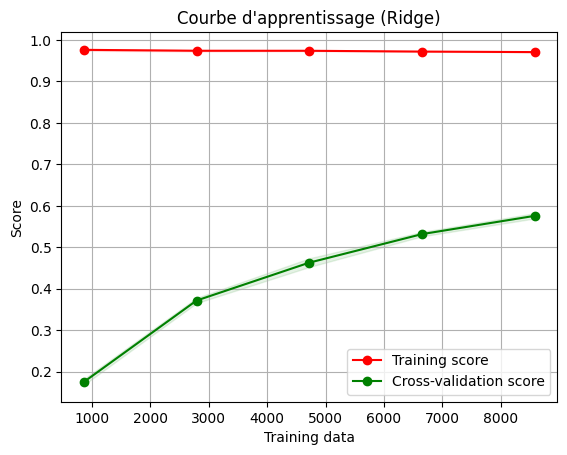

In [31]:
title = "Courbe d'apprentissage (Ridge)"
estimator = model_Ridge
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [ ]:
# Courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y_train, cv=5, scoring='neg_mean_squared_error')
 
# Moyennes des scores sur les plis
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
 
# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Erreur quadratique moyenne")
plt.grid()
 
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Erreur d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Erreur de validation")
 
plt.legend(loc="best")
plt.show()